In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import pandas_datareader.data as web

In [4]:
import datetime

In [5]:
start = datetime.datetime(2009, 12, 29)

In [6]:
end = datetime.datetime(2021, 3, 12 )

In [7]:
code_name = '^KS11'

In [8]:
#code = web.DataReader(code_name, "yahoo", start, end)  # 아래 API를 이용하는 방법

In [9]:
code = web.get_data_yahoo(code_name, start, end)    # API를 활용

In [10]:
code

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-29,1683.050049,1662.069946,1674.959961,1672.479980,318000.0,1672.479980
2009-12-30,1682.770020,1661.109985,1670.189941,1682.770020,326500.0,1682.770020
2010-01-04,1696.140015,1681.709961,1681.709961,1696.140015,296500.0,1696.140015
2010-01-05,1702.390015,1686.449951,1701.619995,1690.619995,408900.0,1690.619995
2010-01-06,1706.890015,1696.099976,1697.880005,1705.319946,426000.0,1705.319946
...,...,...,...,...,...,...
2021-03-08,3055.649902,2992.639893,3031.989990,2996.110107,1928300.0,2996.110107
2021-03-09,3000.489990,2929.360107,2989.959961,2976.120117,1534200.0,2976.120117
2021-03-10,3013.949951,2951.530029,2980.760010,2958.120117,905600.0,2958.120117


In [11]:
import matplotlib.pyplot as plt

In [12]:
plt.figure(figsize = (8,4))

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

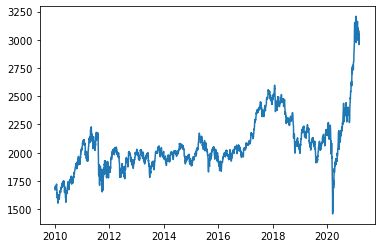

In [13]:
plt.plot(code['Close'])

In [14]:
data = code.filter(['Close']).values

In [15]:
data

array([[1672.47998047],
       [1682.77001953],
       [1696.14001465],
       ...,
       [2958.12011719],
       [3013.69995117],
       [3054.38989258]])

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scalar = MinMaxScaler(feature_range=(0,1))

In [18]:
scaled_data = scalar.fit_transform(data)

In [19]:
scaled_data

array([[0.12267106],
       [0.12854655],
       [0.13618066],
       ...,
       [0.85675629],
       [0.88849171],
       [0.91172518]])

In [20]:
len(scaled_data)

2756

In [21]:
import math

In [22]:
training_data_len = math.ceil(len(scaled_data)*0.8)

In [23]:
training_data_len  # 80%에 해당하는 2205개의 데이터 갯수 출력

2205

In [24]:
# set train data

In [25]:
train_data = scaled_data[0:training_data_len]

In [26]:
train_data = np.array(train_data)

In [27]:
np.shape(train_data)

(2205, 1)

In [28]:
x_train = []

In [29]:
y_train = []

In [30]:
PAST_SET = 60

In [31]:
for i in range(PAST_SET, len(train_data), 5):
    x_train.append(train_data[i-PAST_SET:i, 0])
    y_train.append(train_data[i:i+5, 0])

In [32]:
np.shape(x_train)    

(429, 60)

In [33]:
np.shape(y_train)    # (429,5)으로 저장 : 총 데이터 갯수가 출력의 배수가 되도록 할 것 (210314)

(429, 5)

In [34]:
x_train

[array([0.12267106, 0.12854655, 0.13618066, 0.1330288 , 0.14142229,
        0.12893479, 0.13567819, 0.13502726, 0.13760813, 0.12206014,
        0.13025952, 0.13941247, 0.14511092, 0.14422015, 0.14659548,
        0.15095212, 0.12944869, 0.12136919, 0.10260653, 0.09583462,
        0.10551291, 0.08267339, 0.08496299, 0.07889345, 0.08986211,
        0.09066151, 0.06251177, 0.05432953, 0.06443599, 0.06422473,
        0.08003543, 0.07766581, 0.08188542, 0.09694809, 0.09338506,
        0.07780284, 0.09675962, 0.09778743, 0.08861161, 0.07415422,
        0.07819108, 0.0899192 , 0.0940988 , 0.09167781, 0.10102489,
        0.11556801, 0.11601904, 0.11682415, 0.1136152 , 0.11710965,
        0.10954977, 0.108699  , 0.12859792, 0.12420706, 0.13045364,
        0.12277959, 0.12800407, 0.12754161, 0.1317555 , 0.1370828 ]),
 array([0.12893479, 0.13567819, 0.13502726, 0.13760813, 0.12206014,
        0.13025952, 0.13941247, 0.14511092, 0.14422015, 0.14659548,
        0.15095212, 0.12944869, 0.12136919, 0.

In [35]:
y_train[428]  # 갯수가 5개로 나누어 떨어지는 지 가장 마지막 데이터 확인할 것

array([0.34890224, 0.35293916, 0.34039457, 0.33992632, 0.35682763])

In [36]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [37]:
np.shape(x_train)

(429, 60)

In [38]:
np.shape(y_train)

(429, 5)

In [39]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [40]:
x_train.shape[0]

429

In [41]:
x_train.shape[1]

60

In [42]:
np.shape(x_train)

(429, 60, 1)

In [43]:
x_train

array([[[0.12267106],
        [0.12854655],
        [0.13618066],
        ...,
        [0.12754161],
        [0.1317555 ],
        [0.1370828 ]],

       [[0.12893479],
        [0.13567819],
        [0.13502726],
        ...,
        [0.13430209],
        [0.14933054],
        [0.15179717]],

       [[0.13025952],
        [0.13941247],
        [0.14511092],
        ...,
        [0.15357294],
        [0.15767266],
        [0.15235673]],

       ...,

       [[0.46574932],
        [0.47104239],
        [0.4771005 ],
        ...,
        [0.3670997 ],
        [0.35683334],
        [0.35339027]],

       [[0.48613357],
        [0.48517435],
        [0.49404167],
        ...,
        [0.35708454],
        [0.36644869],
        [0.37147341]],

       [[0.47627831],
        [0.47390305],
        [0.47045997],
        ...,
        [0.38501152],
        [0.37497364],
        [0.36752794]]])

In [44]:
from tensorflow.keras.models import Sequential

In [45]:
from tensorflow.keras.layers import Dense, LSTM

In [46]:
from tensorflow import keras

In [47]:
model = Sequential()

In [48]:
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1))) # 수정 (210314)

In [49]:
model.add(LSTM(128, return_sequences=True))

In [50]:
model.add(LSTM(64, return_sequences=True))

In [51]:
model.add(LSTM(64, return_sequences=False)) # LSTM 추가 (210314)

In [52]:
model.add(Dense(25))

In [53]:
model.add(Dense(5))

In [54]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 64)            49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 25)                1625      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 130       
Total params: 199,899
Trainable params: 199,899
Non-trainable params: 0
__________________________________________________

In [ ]:
model.fit(x_train, y_train, batch_size=20, epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 21ms/step - loss: 0.0387
Epoch 2/100
22/22 [==============================] - 0s 21ms/step - loss: 0.0035
Epoch 3/100
22/22 [==============================] - 0s 21ms/step - loss: 0.0023
Epoch 4/100
22/22 [==============================] - 0s 21ms/step - loss: 0.0013
Epoch 5/100
22/22 [==============================] - 0s 21ms/step - loss: 0.0015
Epoch 6/100
22/22 [==============================] - 0s 20ms/step - loss: 0.0030
Epoch 7/100
22/22 [==============================] - 0s 21ms/step - loss: 0.0021
Epoch 8/100
22/22 [==============================] - 0s 22ms/step - loss: 0.0012
Epoch 9/100
22/22 [==============================] - 0s 21ms/step - loss: 0.0012
Epoch 10/100
22/22 [==============================] - 0s 21ms/step - loss: 0.0011
Epoch 11/100
22/22 [==============================] - 0s 22ms/step - loss: 9.3635e-04
Epoch 12/100
22/22 [==============================] - 0s 21ms/step - loss: 0.0015
Epoch 13/100
22/22 [=

In [304]:
# Training 시간 소요

In [305]:
test_data = scaled_data[training_data_len - PAST_SET:,:]

In [306]:
len(test_data)    # 547개 데이터 (20%) + 60개 (예측 시작 점 전 참고 데이터 갯수 60개)

611

In [307]:
predictions = []

In [308]:
x_test = []

In [309]:
y_test = data[training_data_len:, :]

In [310]:
y_test

array([[2095.55004883],
       [2069.37988281],
       [2071.09008789],
       [2062.11010742],
       [2078.84008789],
       [2060.12011719],
       [2061.48999023],
       [2055.01000977],
       [2028.01000977],
       [2028.43994141],
       [2041.04003906],
       [2010.        ],
       [1993.69995117],
       [2010.25      ],
       [2037.09997559],
       [2025.27001953],
       [2064.70996094],
       [2063.2800293 ],
       [2075.57006836],
       [2064.52001953],
       [2097.17993164],
       [2106.10009766],
       [2107.06005859],
       [2124.2800293 ],
       [2124.61010742],
       [2117.77001953],
       [2127.7800293 ],
       [2145.0300293 ],
       [2177.72998047],
       [2177.30004883],
       [2183.36010742],
       [2206.19995117],
       [2204.85009766],
       [2203.45996094],
       [2203.41992188],
       [2177.05004883],
       [2180.72998047],
       [2190.4699707 ],
       [2201.47998047],
       [2225.85009766],
       [2196.09008789],
       [2210.889

In [311]:
for i in range(PAST_SET, len(test_data), 5):
    x_test.append(test_data[i-PAST_SET:i, 0])

In [312]:
x_test = np.array(x_test)

In [313]:
np.shape(x_test)      # LSTM의 Input 구조를 확인

(111, 60)

In [314]:
x_test

array([[0.47122501, 0.47311501, 0.49139806, ..., 0.34039457, 0.33992632,
        0.35682763],
       [0.48580807, 0.49436717, 0.50334309, ..., 0.35027269, 0.34514523,
        0.35469785],
       [0.50317748, 0.48644193, 0.46641162, ..., 0.34109116, 0.32567448,
        0.32591997],
       ...,
       [0.66706821, 0.67137348, 0.64732925, ..., 0.9262055 , 0.92068981,
        0.87780283],
       [0.70721442, 0.72733032, 0.73531844, ..., 0.90571852, 0.9280555 ,
        0.90550147],
       [0.73590086, 0.74937623, 0.7448882 , ..., 0.86703407, 0.85675629,
        0.88849171]])

In [315]:
np.shape(x_test)

(111, 60)

In [316]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [317]:
predictions = model.predict(x_test)

In [318]:
predictions

array([[0.360542  , 0.3604774 , 0.35888037, 0.3590718 , 0.35843775],
       [0.35741526, 0.3577418 , 0.3568043 , 0.35626474, 0.35551748],
       [0.33595535, 0.337212  , 0.3368693 , 0.33594665, 0.33485195],
       [0.33219463, 0.33157673, 0.33122364, 0.33148658, 0.33002844],
       [0.35872734, 0.35851434, 0.3579847 , 0.35746175, 0.35730815],
       [0.39012426, 0.390938  , 0.38862318, 0.3884999 , 0.38961318],
       [0.42378318, 0.42404214, 0.41998366, 0.42073148, 0.42183608],
       [0.43277675, 0.4352692 , 0.43124038, 0.43063465, 0.43197554],
       [0.44646296, 0.4461489 , 0.44145352, 0.44241858, 0.44275245],
       [0.44933054, 0.44929484, 0.44524708, 0.44564578, 0.44585374],
       [0.43649447, 0.4381735 , 0.43549332, 0.4343609 , 0.43475214],
       [0.40593415, 0.40628463, 0.40484792, 0.40389624, 0.40305504],
       [0.41677073, 0.41443607, 0.41273034, 0.41329747, 0.41203716],
       [0.42374238, 0.42333916, 0.42141688, 0.42150036, 0.42159653],
       [0.39919907, 0.39918014, 0.

In [319]:
predictions = scalar.inverse_transform(predictions)

In [320]:
np.shape(predictions)

(111, 5)

In [321]:
predictions     # 예측 결과 window와 차이 : predict 계산 결과의 차이 : sklearn 등 다른 문제는 없음 # 모델 수정(210314)

array([[2089.0752, 2088.9622, 2086.165 , 2086.5005, 2085.39  ],
       [2083.599 , 2084.1711, 2082.5293, 2081.5842, 2080.2754],
       [2046.0154, 2048.2163, 2047.6161, 2046.0001, 2044.0829],
       [2039.4291, 2038.347 , 2037.7286, 2038.189 , 2035.6354],
       [2085.897 , 2085.5242, 2084.5967, 2083.6807, 2083.4116],
       [2140.884 , 2142.3093, 2138.2551, 2138.0393, 2139.989 ],
       [2199.8325, 2200.2864, 2193.1785, 2194.488 , 2196.4226],
       [2215.5835, 2219.9487, 2212.8928, 2211.832 , 2214.1804],
       [2239.553 , 2239.003 , 2230.7795, 2232.4697, 2233.0544],
       [2244.575 , 2244.5127, 2237.4236, 2238.1218, 2238.486 ],
       [2222.0945, 2225.0352, 2220.3413, 2218.358 , 2219.0432],
       [2168.5728, 2169.1865, 2166.6704, 2165.0037, 2163.5305],
       [2187.5515, 2183.4626, 2180.475 , 2181.4685, 2179.2615],
       [2199.7612, 2199.0552, 2195.6885, 2195.8347, 2196.003 ],
       [2156.7773, 2156.7441, 2154.2498, 2154.067 , 2153.5774],
       [2227.0928, 2226.1016, 2221.833 ,

In [322]:
predictions.shape = (111*5, 1)

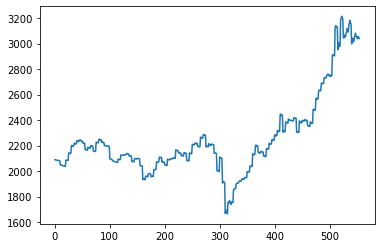

In [323]:
plt.plot(predictions)

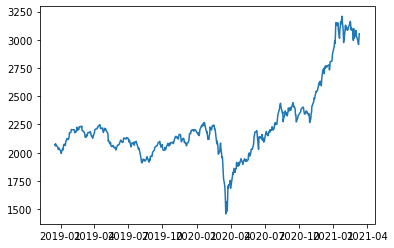

In [285]:
plt.plot(valid)

In [75]:
len(predictions)

555

In [76]:
#rmse = np.sqrt(np.mean(predictions - y_test)**2)

In [77]:
#rmse

In [78]:
data = code.filter(['Close'])

In [79]:
data

,Close
Date,
2009-12-29,1672.479980
2009-12-30,1682.770020
2010-01-04,1696.140015
2010-01-05,1690.619995
2010-01-06,1705.319946
...,...
2021-03-08,2996.110107
2021-03-09,2976.120117
2021-03-10,2958.120117


In [80]:
train = data[:training_data_len]

In [81]:
train

,Close
Date,
2009-12-29,1672.479980
2009-12-30,1682.770020
2010-01-04,1696.140015
2010-01-05,1690.619995
2010-01-06,1705.319946
...,...
2018-12-06,2068.689941
2018-12-07,2075.760010
2018-12-10,2053.790039


In [83]:
valid = data[training_data_len:len(data)]  # 5개씩 예측하므로 끝자리가 딱 맞아 떨어지지 않으므로 끝을 맞출 것 : Pandas 시간

In [84]:
#type(valid)

In [85]:
start = datetime.datetime(2010, 1, 1)

In [86]:
end = datetime.datetime(2021, 3, 12)

In [87]:
code = web.get_data_yahoo(code_name, start, end)    # API를 활용

In [88]:
code

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1696.140015,1681.709961,1681.709961,1696.140015,296500.0,1696.140015
2010-01-05,1702.390015,1686.449951,1701.619995,1690.619995,408900.0,1690.619995
2010-01-06,1706.890015,1696.099976,1697.880005,1705.319946,426000.0,1705.319946
2010-01-07,1707.900024,1683.449951,1702.920044,1683.449951,462400.0,1683.449951
2010-01-08,1695.260010,1668.839966,1694.060059,1695.260010,380000.0,1695.260010
...,...,...,...,...,...,...
2021-03-08,3055.649902,2992.639893,3031.989990,2996.110107,1928300.0,2996.110107
2021-03-09,3000.489990,2929.360107,2989.959961,2976.120117,1534200.0,2976.120117
2021-03-10,3013.949951,2951.530029,2980.760010,2958.120117,905600.0,2958.120117


In [89]:
data = code.filter(['Close'])

In [90]:
len(data)

2754

In [91]:
valid = data[training_data_len:len(data)]

In [92]:
valid

,Close
Date,
2018-12-17,2071.090088
2018-12-18,2062.110107
2018-12-19,2078.840088
2018-12-20,2060.120117
2018-12-21,2061.489990
...,...
2021-03-08,2996.110107
2021-03-09,2976.120117
2021-03-10,2958.120117


In [93]:
len(predictions)

555

In [101]:
len(valid)

549

In [95]:
#predictions = pd.DataFrame(predictions, columns = ['Predictions'])

In [102]:
predictions

array([[2071.1016],
       [2064.0398],
       [2072.2998],
       [2075.8115],
       [2067.8818],
       [2085.2913],
       [2077.953 ],
       [2080.525 ],
       [2080.6565],
       [2076.4253],
       [2055.4053],
       [2048.6519],
       [2047.2493],
       [2045.2036],
       [2044.1407],
       [2026.1736],
       [2020.046 ],
       [2019.2089],
       [2016.9774],
       [2018.4307],
       [2059.3074],
       [2058.6274],
       [2058.293 ],
       [2060.63  ],
       [2064.0398],
       [2101.21  ],
       [2102.9001],
       [2104.505 ],
       [2111.2505],
       [2112.815 ],
       [2150.1853],
       [2150.0525],
       [2150.8474],
       [2157.5037],
       [2156.649 ],
       [2199.8623],
       [2199.9766],
       [2197.045 ],
       [2202.554 ],
       [2200.8313],
       [2217.6978],
       [2212.766 ],
       [2204.9546],
       [2204.0488],
       [2204.084 ],
       [2238.0159],
       [2233.432 ],
       [2217.5435],
       [2209.175 ],
       [2215.1453],


In [100]:
len(valid)

549

In [99]:
valid.loc[:,'Predictions'] = np.array(predictions)

ValueError: Length of values (555) does not match length of index (549)

In [820]:
valid

,Close,Predictions
Date,,
2018-11-26,2083.020020,2058.511719
2018-11-27,2099.419922,2052.667969
2018-11-28,2108.219971,2056.084229
2018-11-29,2114.100098,2047.559937
2018-11-30,2096.860107,2043.127197
...,...,...
2021-02-15,3147.000000,3114.983398
2021-02-16,3163.250000,3089.388672
2021-02-17,3133.729980,3095.787354


In [821]:
plt.figure(figsize = (15,4))

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

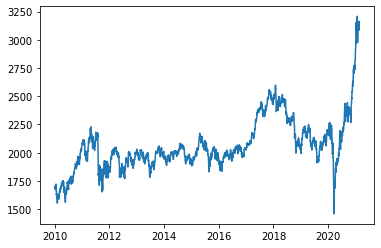

In [822]:
plt.plot(data['Close'])

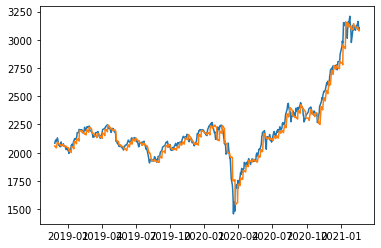

In [832]:
plt.plot(valid[['Close', 'Predictions']])    # 60개의 데이터를 입력받아 5개의 데이터를 한꺼번에 계산한 결과

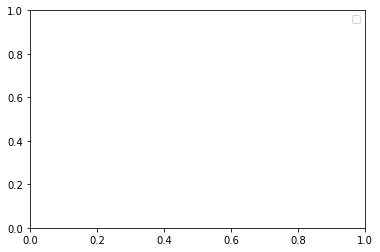

In [286]:
plt.legend(['Train', 'Val', 'Predictions'])

In [287]:
plt.show()